In [1]:
import numpy as np
from scipy.optimize import curve_fit,fsolve
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\ambap\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


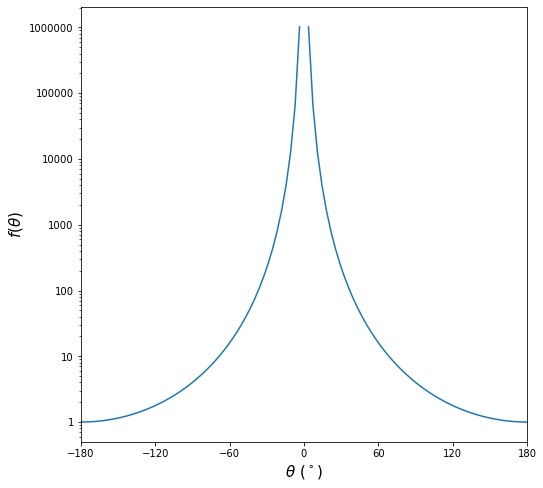

In [2]:
#semilogy Plot of f(theta)
def f(theta,A,B):
    thetarad = np.deg2rad(theta)
    Brad = np.deg2rad(B)
    return A/(np.sin((thetarad-Brad)/2))**4

degrange = np.linspace(-180,180,101)
plt.semilogy(degrange,f(degrange,1,0))
plt.xlim(-180,180)
plt.xticks([-180,-120,-60,0,60,120,180])
plt.yticks([1,10,100,1000,10000,100000,1000000],['1','10','100','1000','10000','100000','1000000'])
plt.xlabel(r'$\theta \ (^\circ)$',fontsize=15)
plt.ylabel(r'$f(\theta)$',fontsize=15)
plt.gcf().set_size_inches(8,8)
# plt.savefig('f_vs_theta')
plt.show()

#Note: To observe the singularity, we need to try to evaluate f(0 degree), which will result in a 'divide by 0' warning
#But that is not a problem/no harm.

In [3]:
#Calculating error in Nd
Nd = np.array([7.6222,4.8833,1.1833,0.1637,0.6033,0.1991,0.0733])
#These values of Nd are copied from the observation table
theta = np.array([0,5,10,15,-5,-10,-15]) #degrees
times = np.array([60,100,400,900,100,400,900])
sigmaNd = np.sqrt(Nd/(3*times)) #numpy library automatically broadcasts the operation over entire array
dataarr1 = np.array([theta,times,Nd,sigmaNd]).T #Concatenate all into coulmn array
df1 = pd.DataFrame(data = dataarr1,columns = [r'$\theta \ (^\circ)$',r'Time (in s)',r'$N_d$ (1/s)',r'$\sigma_{N_d}$ (1/s)'])
df1

,$\theta \ (^\circ)$,Time (in s),$N_d$ (1/s),$\sigma_{N_d}$ (1/s)
0,0.0,60.0,7.6222,0.205780
1,5.0,100.0,4.8833,0.127584
2,10.0,400.0,1.1833,0.031402
3,15.0,900.0,0.1637,0.007787
4,-5.0,100.0,0.6033,0.044844
5,-10.0,400.0,0.1991,0.012881
6,-15.0,900.0,0.0733,0.005210


In [4]:
#Correct N(theta values)
B = 1.7083 #Calculated by hand, see the graph paper plot and calculation in report
N = Nd*2*np.pi**np.sin(np.abs(np.deg2rad(theta-B)))
sigmaN = sigmaNd*np.sin(np.abs(np.deg2rad(theta-B)))
dataarr2 = np.array([theta,Nd,sigmaNd,N,sigmaN]).T #Concatenate all into coulmn array
df2 = pd.DataFrame(data = dataarr2,columns = [r'$\theta \ (^\circ)$',r'$N_d$ (1/s)',r'$\sigma_{N_d}$ (1/s)',r'$N$ (1/s)',r'$\sigma_{N}$ (1/s)'])
df2

,$\theta \ (^\circ)$,$N_d$ (1/s),$\sigma_{N_d}$ (1/s),$N$ (1/s),$\sigma_{N}$ (1/s)
0,0.0,7.6222,0.205780,15.773602,0.006135
1,5.0,4.8833,0.127584,10.430123,0.007326
2,10.0,1.1833,0.031402,2.791388,0.004529
3,15.0,0.1637,0.007787,0.425969,0.001790
4,-5.0,0.6033,0.044844,1.379233,0.005238
5,-10.0,0.1991,0.012881,0.502328,0.002614
6,-15.0,0.0733,0.005210,0.203734,0.001498


In [5]:
fvals = f(theta,1,1.7083)
dataarr3 = np.array([theta,fvals, N]).T #Concatenate all into coulmn array
df3 = pd.DataFrame(data = dataarr3,columns = [r'$\theta \ (^\circ)$',r'$f(\theta-B)$',r'$N$ (1/s)'])
df3

,$\theta \ (^\circ)$,$f(\theta-B)$,$N$ (1/s)
0,0.0,2.024969e+07,15.773602
1,5.0,1.469496e+06,10.430123
2,10.0,3.660601e+04,2.791388
3,15.0,5.574238e+03,0.425969
4,-5.0,8.534006e+04,1.379233
5,-10.0,9.239719e+03,0.502328
6,-15.0,2.244095e+03,0.203734


In [6]:
#Calculation of slope A
xi = fvals[np.where(np.abs(theta)>5)] #Select only the data points where theta = +/- 10 or +/-15 degrees
yi = N[np.where(np.abs(theta)>5)]#Select only the data points where theta = +/- 10 or +/-15 degrees
A = np.sum(xi*yi)/np.sum(xi*xi)
dA = np.sqrt(1/(len(xi)-1)*np.sum((yi-A*xi)**2)/np.sum(xi*xi))
print('A = '+str(A)+' +/- '+str(dA)+' 1/s')

A = 7.502982009653325e-05 +/- 3.0119225843482158e-06 1/s


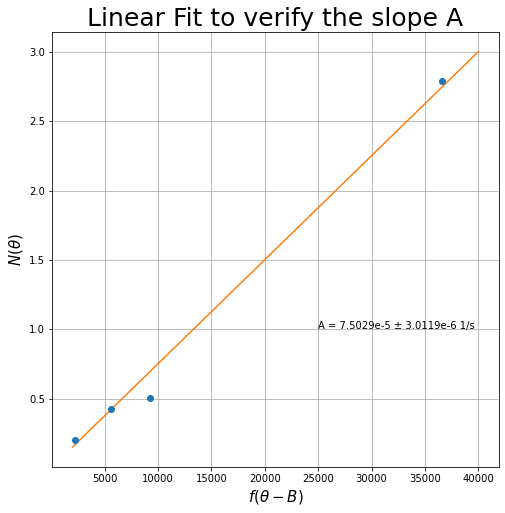

In [7]:
#Linear fit plot
dxi = sigmaN[np.where(np.abs(theta)>5)] #Again, select the errors corresponding to the chosen theta values
plt.errorbar(xi, yi, xerr = dxi,fmt='o')
plt.plot([2000,40000],[A*2000,A*40000])
plt.grid()
plt.gcf().set_size_inches(8,8)
plt.xlabel(r'$f(\theta - B)$',fontsize=15)
plt.ylabel(r'$N(\theta)$',fontsize=15)
plt.title('Linear Fit to verify the slope A', fontsize=25)
plt.text(25000,1,'A = 7.5029e-5 ± 3.0119e-6 1/s',fontsize=10)
plt.savefig('LinearPlot')
plt.show()